<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-del-projecto-equipo-173/blob/main/Reto_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Instituto Tecnológico y de Estudios Superiores de Monterrey
#Reto 2: Clasificación-ensambles
Arturo Eduardo Loperena GutierrezA01793641

Karla Daniela Valenzuela Gomez A00819192

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as sts
import pandas as pd
import scipy as scp
import numpy as np
import sklearn.preprocessing as preprocessing

from sklearn import linear_model as lm
from sklearn import metrics

from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import silhouette_score
from sklearn.metrics import classification_report
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import RepeatedStratifiedKFold, cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split, learning_curve, validation_curve

import requests, zipfile
from io import BytesIO

from tqdm import tqdm
from shapely.geometry import Point
from yellowbrick.cluster import SilhouetteVisualizer, KElbowVisualizer

from geopy.geocoders import Nominatim
import geopy.distance

from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import matplotlib.colors

from packaging import version

In [17]:
url = 'http://201.116.60.46/Datos_de_calidad_del_agua_de_5000_sitios_de_monitoreo.zip'
req = requests.get(url)
zipfile.ZipFile(BytesIO(req.content)).extractall('unzipped_zip/')
df=pd.read_csv('unzipped_zip/Datos_de_calidad_del_agua_2020/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_subterraneas_2020.csv', encoding = 'latin1')
df.head()

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,...,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,...,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI


In [18]:
binarias = ['CUMPLE_CON_ALC', 'CUMPLE_CON_COND', 'CUMPLE_CON_SDT_ra',
            'CUMPLE_CON_SDT_salin', 'CUMPLE_CON_FLUO', 'CUMPLE_CON_DUR',
            'CUMPLE_CON_CF', 'CUMPLE_CON_NO3', 'CUMPLE_CON_AS', 'CUMPLE_CON_CD',
            'CUMPLE_CON_CR', 'CUMPLE_CON_HG', 'CUMPLE_CON_PB', 'CUMPLE_CON_MN',
            'CUMPLE_CON_FE']


df[binarias].describe()

,CUMPLE_CON_ALC,CUMPLE_CON_COND,CUMPLE_CON_SDT_ra,CUMPLE_CON_SDT_salin,CUMPLE_CON_FLUO,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
count,1068,1068,1068,1068,1068,1068,1068,1068,1068,1068,1068,1068,1068,1068,1068
unique,3,3,3,3,2,3,2,3,2,2,2,2,2,2,2
top,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
freq,1005,939,995,995,876,841,1007,985,941,1066,1053,1067,1056,982,932


In [19]:
# Cambian los valores 'ND' por 'SI'

df.CUMPLE_CON_ALC = df.CUMPLE_CON_ALC.replace("ND","SI")
df.CUMPLE_CON_COND = df.CUMPLE_CON_COND.replace("ND","SI")
df.CUMPLE_CON_SDT_ra = df.CUMPLE_CON_SDT_ra.replace("ND","SI")
df.CUMPLE_CON_SDT_salin = df.CUMPLE_CON_SDT_salin.replace("ND","SI")
df.CUMPLE_CON_DUR = df.CUMPLE_CON_DUR.replace("ND","SI")
df.CUMPLE_CON_NO3 = df.CUMPLE_CON_NO3.replace("ND","SI")

In [20]:
le = preprocessing.LabelEncoder()

X = pd.DataFrame()
for i in df[binarias].columns:
  le.fit(df[binarias][i])
  LabelEncoder()
  X[i]=le.transform(df[binarias][i])

In [21]:
# X Variables de cumpliemiento codificadas con 0 y 1
Y = df['SEMAFORO'] #Variable de semáforo

In [22]:
#Antes de preproceso
Y.value_counts()

Verde       434
Rojo        387
Amarillo    247
Name: SEMAFORO, dtype: int64

In [23]:
le = preprocessing.LabelEncoder()
le.fit(Y)
Y=pd.DataFrame(le.transform(Y))
Y.value_counts()

2    434
1    387
0    247
dtype: int64

In [24]:
Y[0] = Y[0].replace([2,1,0],[1,3,2])
Y.value_counts(sort=False)

1    434
2    247
3    387
dtype: int64

In [25]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, random_state=42)
rnd_clf.fit(X, np.ravel(Y))
for score, name in zip(rnd_clf.feature_importances_, X.columns):
    print(round(score, 2), name)

0.03 CUMPLE_CON_ALC
0.04 CUMPLE_CON_COND
0.01 CUMPLE_CON_SDT_ra
0.01 CUMPLE_CON_SDT_salin
0.23 CUMPLE_CON_FLUO
0.17 CUMPLE_CON_DUR
0.09 CUMPLE_CON_CF
0.12 CUMPLE_CON_NO3
0.12 CUMPLE_CON_AS
0.0 CUMPLE_CON_CD
0.03 CUMPLE_CON_CR
0.0 CUMPLE_CON_HG
0.02 CUMPLE_CON_PB
0.07 CUMPLE_CON_MN
0.07 CUMPLE_CON_FE


In [26]:
X_var = X[['CUMPLE_CON_FLUO','CUMPLE_CON_DUR','CUMPLE_CON_NO3','CUMPLE_CON_AS','CUMPLE_CON_CF']].copy()
X_var.head()

,CUMPLE_CON_FLUO,CUMPLE_CON_DUR,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CF
0,1,1,1,1,1
1,1,1,1,1,1
2,0,1,1,0,1
3,1,1,1,1,1
4,1,1,0,1,1


In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_var, Y, test_size = 0.2, random_state = 35)

In [28]:
# Decision Tree

tree_clf = DecisionTreeClassifier(max_depth=3, random_state=42, class_weight = 'balanced')
tree_clf.fit(X_train, y_train)

y_pred_dt = tree_clf.predict(X_test)
print(round(accuracy_score(y_test, y_pred_dt)*100, 1),'%')

77.6 %


In [29]:
# Random Forest

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=42, class_weight = 'balanced')
rnd_clf.fit(X_train, np.ravel(y_train))
y_pred_rf = rnd_clf.predict(X_test)
print(round(accuracy_score(y_test, y_pred_rf)*100, 1),'%')

88.3 %


In [30]:
print(classification_report(y_test, y_pred_dt, labels=[1, 2, 3]))

              precision    recall  f1-score   support

           1       0.66      1.00      0.80        82
           2       0.85      0.61      0.71        56
           3       1.00      0.66      0.79        76

    accuracy                           0.78       214
   macro avg       0.84      0.76      0.77       214
weighted avg       0.83      0.78      0.77       214



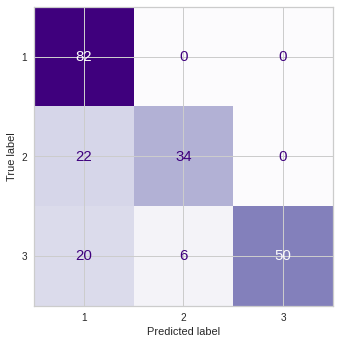

In [36]:
plt.rc('font', size=15)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_dt, cmap = 'Purples', colorbar = False)
plt.show()

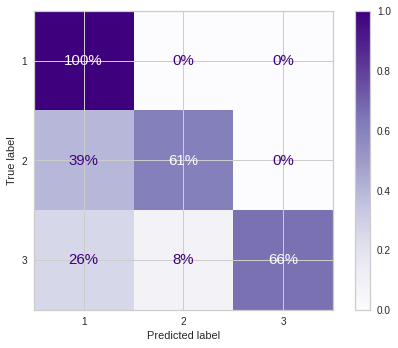

In [37]:
plt.rc('font', size=15)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_dt, normalize="true", values_format=".0%", cmap = 'Purples')
plt.show()

In [33]:
print(classification_report(y_test, y_pred_rf, labels=[1, 2, 3]))

              precision    recall  f1-score   support

           1       0.77      1.00      0.87        82
           2       0.97      0.61      0.75        56
           3       1.00      0.96      0.98        76

    accuracy                           0.88       214
   macro avg       0.92      0.86      0.87       214
weighted avg       0.91      0.88      0.88       214



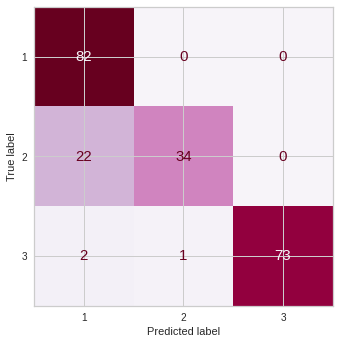

In [38]:
plt.rc('font', size=15)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf, cmap = 'PuRd', colorbar = False)
plt.show()

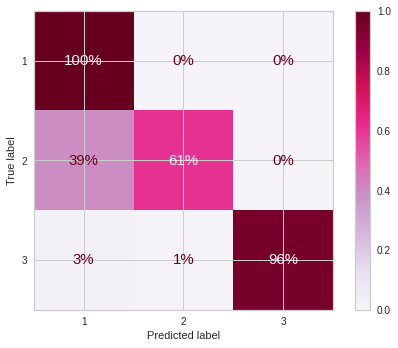

In [39]:
plt.rc('font', size=15)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf, normalize="true", values_format=".0%", cmap = 'PuRd')
plt.show()

#Conclusiones
Random forest resulto tener mejores resultados, tuvo un mejor accuracy de 88% a comparacion del 78% que obtuvimos con el modelo de arbol. 

En las matrices de confusion podemos observar como el modelo de random forest tuvo una mejor clasificacion de la clase 3 y esto es la razon por el aumento de precision. 

Tambien podemos ver que los dos modelos clasifican mal los casos 2 y 3 y por esta razon ninguno de los dos logro mejorar el pronostico de la clase dos. 
